# Introduction

This is our Final Project for Big Ideas in Computing and Information in which we were tasked with finding the 'best' neighborhood in Pittsburgh. To determine the best neighborhood, we looked at a multitude of different datasets, which gave us many ideas for what our metric could be. We originally started out with finding the highest rent-to-income ratio among neighborhoods, but eventually landed on the best neighborhood to own a dog in. 

# The Metric

For our final project we found the best city to own a dog in. To do this, we used the metrics of the number of parks, amount of traffic, and number of smart trash containers a neighborhood has. We decided on these metrics as parks are a great place to walk a dog, lots of traffic is unsafe for dogs, and trash containers are needed while walking a dog. With these three metrics combined we were able to figure out what the best niehgborhood to own a dog in is. Below are links of the datasets used in our investigation.

- https://data.wprdc.org/dataset/smart-trash-containers/resource/75b83ac9-8069-4cf1-bcc3-b9e6b04487d9
- https://data.wprdc.org/dataset/parks/resource/fa329e3d-89ff-4708-8dall-81bfedcad11d/view/3dae5fa4-b30f-467c-84bc-f42e670b2fce
- https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh

# The Best Neighborhood

In [24]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

First we need to import the datasets and preprocess/clean up the data for our use case. For each dataset, we will be looking for the neighborhood and our chosen statistic. 

**Trash Containers**

In [25]:
# import data set and get only the neighborhoods
containers = pd.read_csv('nfb25/trash-containers.csv')
containers = containers[['neighborhood']]
containers.head()

,neighborhood
0,Central Northside
1,Marshall-Shadeland
2,Central Northside
3,Allegheny Center
4,Central Northside


As this data contains each trash container along with the neighborhood it is in, after only keeping the neighborhoods, we are left with all the neighborhood occurances. This is great, but does not give us the count of each neighborhood in a useful way. 

In [26]:
# get count of each neighborhood
containers = containers['neighborhood'].value_counts()
data = {
  "neighborhood": containers.keys(),
  "containers": containers.values
}

containers = pd.DataFrame(data)
containers.head()

,neighborhood,containers
0,Shadyside,76
1,East Liberty,68
2,Squirrel Hill South,63
3,Bloomfield,58
4,North Shore,53


The code above counts each occurance of each neighborhood and totals them. These values are then placed in a new column labeled count, representing the total number of smart trash containers located in each neighborhood. These are then sorted from highest to lowest for easier usage. After cleanup, we are left with the chart below. 

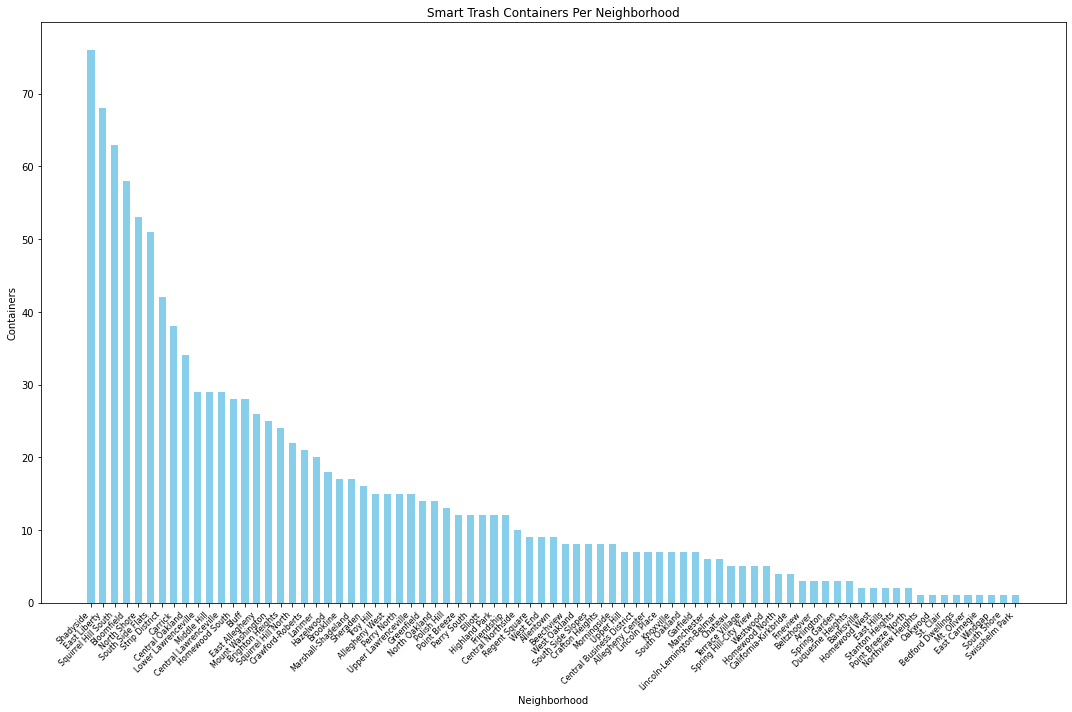

In [15]:
# display chart of trash containers
plt.figure(figsize=(15, 10))
plt.xlabel('Neighborhood')
plt.ylabel('Containers')
plt.bar(containers['neighborhood'], containers['containers'], width = .6, color='skyblue')
plt.title('Smart Trash Containers Per Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

The chart above shows the number of smart trash containers located in each neighborhood. For our metric, the best neighborhood is located on the left as the more containers the better. Based on the data, Shadyside has the greatest number of smart trash containers, making it the best in this metric. 

**Traffic**

In [27]:
# import traffic
traffic = pd.read_csv('dantewarhola/traffic.csv')
traffic.head()

,_id,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,536,699716104,304,1.070642e+09,NaN,NaN,10001.0,NaN,NaN,StatTrak,...,-79.921299,40.443821,Squirrel Hill North,8.0,14.0,42003140300,3.0,14.0,4.0,2-18
1,695,2068404339,321,5.356643e+08,2020-11-05,2020-11-13,10113.0,NaN,5,StatTrak,...,-79.937376,40.453982,Shadyside,8.0,7.0,42003070900,2.0,7.0,4.0,3-22
2,19,1159852619,118,1.024536e+09,2019-07-09,2019-07-12,10350.0,NaN,12,StatTrak,...,-80.001937,40.447849,North Shore,1.0,22.0,42003563200,6.0,22.0,1.0,1-20
3,235,1084152705,230,1.951529e+09,2020-01-23,2020-01-31,1036.0,NaN,4,StatTrak,...,-79.924263,40.435829,Squirrel Hill South,5.0,14.0,42003141300,3.0,14.0,4.0,2-21
4,208,619209258,225,1.008927e+09,2019-12-30,2020-01-14,1043.0,NaN,5,StatTrak,...,-80.028303,40.472465,Marshall-Shadeland,1.0,27.0,42003271500,1.0,27.0,1.0,1-14


The code above shows the average daily per traffic neighborhood in Pittsburgh. There is a lot of information inside this dataframe that we do not need.

In [28]:
df = pd.read_csv('dantewarhola/traffic.csv')
df = df[['average_daily_car_traffic', 'neighborhood']]

# Convert 'None' to NaN and sort the DataFrame
df_sorted = df.replace('None', pd.NA).sort_values(by='average_daily_car_traffic', ascending=True)

# Convert the column to integers, handling NaN values
columns_to_convert = ['average_daily_car_traffic']

for col in columns_to_convert:
    df_sorted[col] = pd.to_numeric(df_sorted[col], errors='coerce').astype('Int64')

df_sorted = df_sorted.groupby('neighborhood', as_index=False).mean().sort_values(by="average_daily_car_traffic").dropna()

traffic = df_sorted.rename(columns={'average_daily_car_traffic': 'traffic'})
traffic.head()

,neighborhood,traffic
57,South Side Flats,115.0
34,Lincoln Place,126.0
35,Lincoln-Lemington-Belmar,195.0
25,Fineview,419.0
1,Allegheny West,477.0


I then was able to remove all of the useless information from the dataframe and organize it in ascending order.

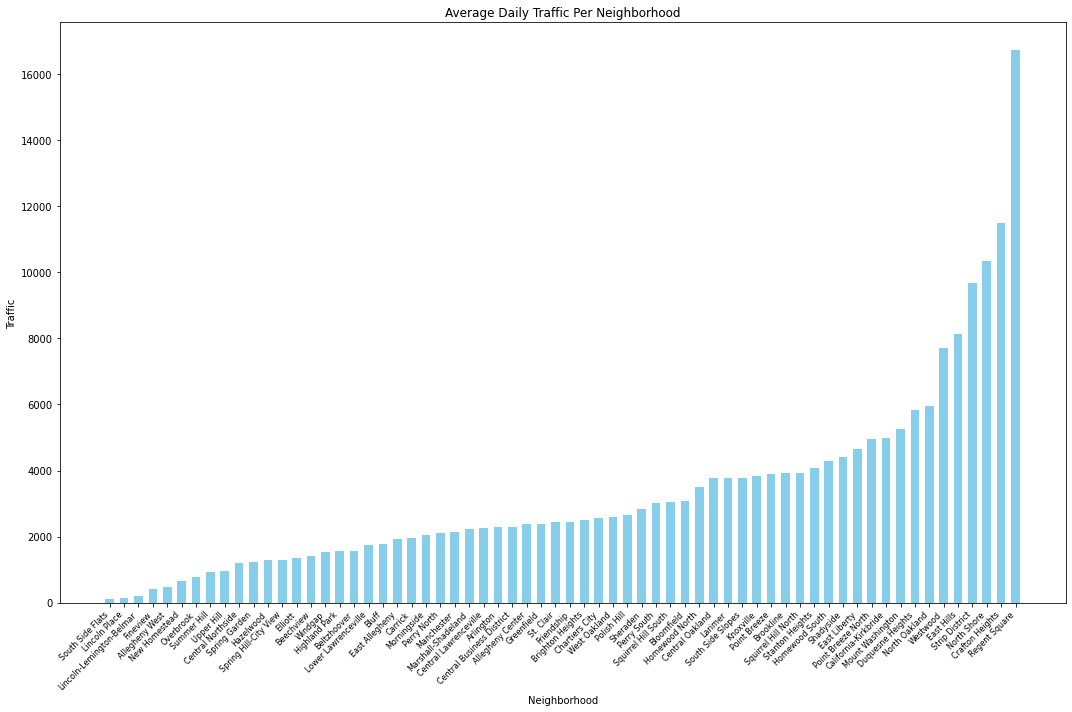

In [29]:
# display chart of traffic
plt.figure(figsize=(15, 10))
plt.xlabel('Neighborhood')
plt.ylabel('Traffic')
plt.bar(traffic['neighborhood'], traffic['traffic'], width = .6, color='skyblue')
plt.title('Average Daily Traffic Per Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

The chart above shows the daily average traffic count per neighborhood. As traffic is unsafe for dogs, the best neighborhood is located on the left side of the chart. Based on this, the best neighborhood to own a dog based on traffic would be the Side Flats. 

**Parks**

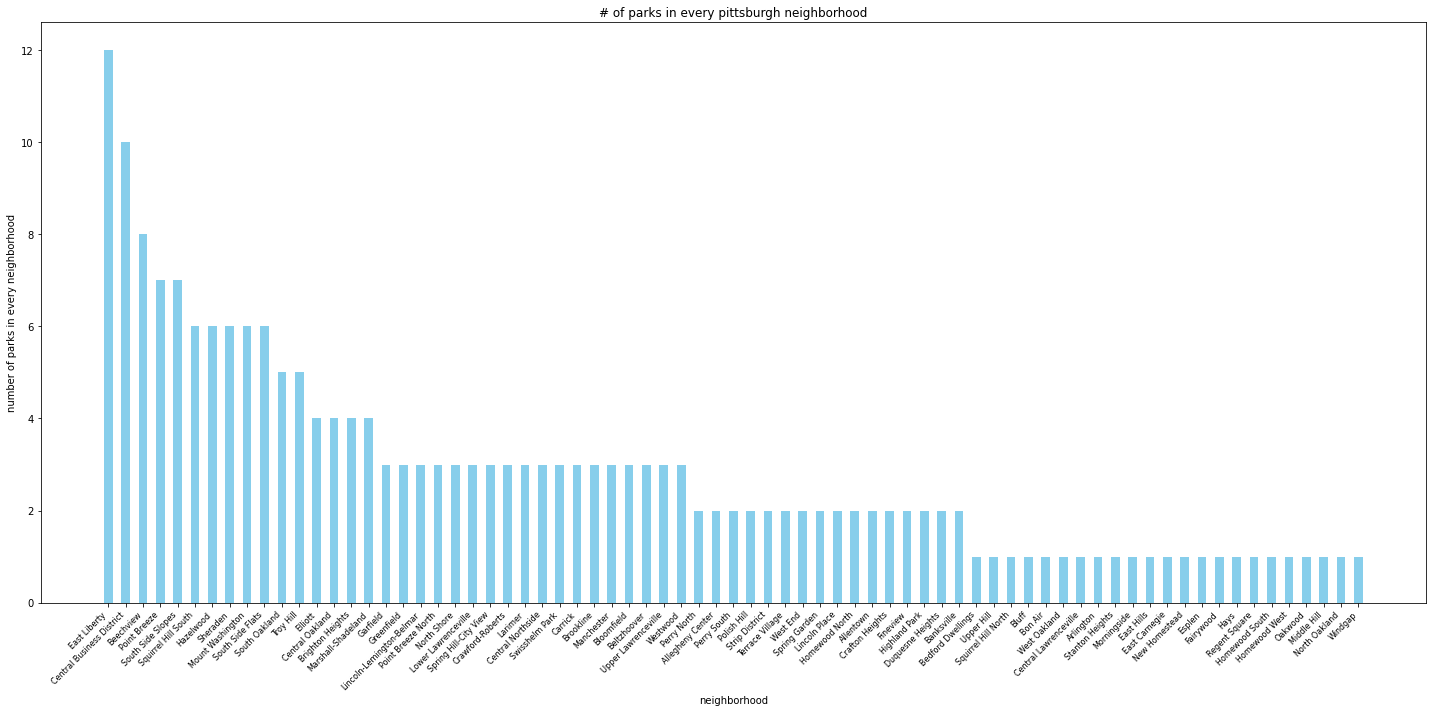

In [30]:
#display chart of parks 
#Reading the data
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('ROW03/formatted_data_park')
#Only reading the name and neighborhood column
df = df[['name', 'neighborhood']]
plt.figure(figsize = (20,10))
#Counting the amount of parks in each neighborhood
numberofparks = df['neighborhood'].value_counts()
data = {
  "neighborhood": numberofparks.keys(),
  "parks": numberofparks.values
}
parks = pd.DataFrame(data)
#The x-axis is labeled as neighborhood and the y-axis is labeled as number of parks in every neighborhood
plt.xlabel('neighborhood')
plt.ylabel('number of parks in every neighborhood')
#Designing the graph
plt.bar(parks['neighborhood'], parks['parks'], width = 0.5, color = 'skyblue')
plt.title('# of parks in every pittsburgh neighborhood')
plt.xticks(rotation = 45, ha = 'right', fontsize = 8)
plt.tight_layout()
plt.show()

The chart above shows the neighborhood names on the x axis and the number of parks in each neighborhood, in order to determine the best neighborhood to own a dog, the more park the better because more parks allows dogs to enjoy running around without a leash and interacting with other dogs and people as well. 

Since each metric is very different, we need some way to incorporate all of the metrics. In order to combine the metrics to get the best neighborhood, we used the pandas function 'rank', which allowed us to compute the best neighborhood. As this process incorporates all three metrics, we needed to include weights for each of the metrics. We decided that traffic was the most important, followed by parks, and then trash containers. 

In [34]:
# merge into one dataframe
all = pd.merge(containers, traffic, on='neighborhood')
all = pd.merge(all, parks, on='neighborhood')
# normalize the data
all['traffic'] = 1 - (all['traffic'] - all['traffic'].min()) / (all['traffic'].max() - all['traffic'].min())
all['containers'] = (all['containers'] - all['containers'].min()) / (all['containers'].max() - all['containers'].min())
all['parks'] = (all['parks'] - all['parks'].min()) / (all['parks'].max() - all['parks'].min())
# specify and add weights
weights = {'traffic': 1, 'containers': .5, 'parks': .75}
all['rankings'] = all['traffic'] * weights['traffic'] + all['containers'] * weights['containers'] + all['parks'] * weights['parks']
# rank all neighborhoods
all = all.sort_values(by='rankings', ascending=False)
all.head()

,neighborhood,containers,traffic,parks,rankings
0,East Liberty,1.000000,0.726507,1.000000,1.976507
4,South Side Flats,0.746269,1.0,0.454545,1.714043
1,Squirrel Hill South,0.925373,0.823337,0.454545,1.626933
36,Central Business District,0.089552,0.868183,0.818182,1.526596
30,Beechview,0.104478,0.921552,0.636364,1.451064


# Conclusion

Based on all the data presented, we have come to the conclusion that based on the number of smart trash containers, average daily traffic, and the number of parks, that the best neighborhood to own a dog is East Liberty.

**Nate's Reflection**

My personal favorite neighborhood is Squirrel Hill South, which was ranked third in our investigation. This didn't suprise me that it was ranked so high as it is a very nice neighborhood

**Dante's Reflection**

My personal favorite neighborhood is Lincoln Place, which was unranked in our investigation. This was suprising because it is a very small city that has little to none traffic which would be best to raise a dog in.

**Roger's Reflection**

My personal favorite neighborhood is East Liberty, which was ranked first in our investigation. This wasn't a surprise for me becauase East Liberty has the most parks, so it being the best place to raise a dog isn't a surprise.